In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import *
import random
import math

r = .5

global figs
figs = []

class Dragon:
  pass   

class Deer:
  pass

In [ ]:
def initialize():
  global t
  t=0
  # global dragons 
  # dragons = []
  global dragon       
  dragon = Dragon()
  global deers
  deers = []
  global pregnantdeers
  pregnantdeers = []
  global dead 
  dead = False
  global year
  year = 0
  global max_weight
  max_weight = 10000
  global max_weight_day
  max_weight_day = 0

  # for i in range(1):
  #   dra = dragon()
  #   dra.x = 100*random.random()
  #   dra.y = 100*random.random()
  #   dra.weight = 10000
  #   dra.birthday = 1
  #   dragons.append(dra)

  dragon.x = 100*random.random()
  dragon.y = 100*random.random()
  dragon.weight = 10000
  dragon.netcalories = 0
  dragon.dailydistance = 0
  
  for i in range(50000):
    de = Deer()
    de.x = 100*random.random()
    de.y = 100*random.random()
    de.gender = math.floor(2*random.random())
    de.unbornchildren = math.floor(2*random.random()) if de.gender == 0 and random.random() < (1/4) else 0
    de.children = 0
    deers.append(de)
    if de.unbornchildren > 0:
      pregnantdeers.append(de)

In [ ]:
def observe():
  global dragon
  global deers
  global year
  
  cla()

  for de in deers:
    plt.plot(de.x, de.y, 'o', color='black', markersize=1)
  if dead == False:
    plt.plot(dragon.x, dragon.y, 'o', color='red', markersize=10)
  
  if year == 0:
    plt.title("Initial State of Ecosystem")
  elif year == 1:
    plt.title("State of Ecosystem After " + str(year) + " Year")
  else:
    plt.title("State of Ecosystem After " + str(year) + " Years")
  plt.xlim(0, 100)
  plt.ylim(0, 100)
  figs.append(plt.gcf())
  plt.show()
  if dead == False:
    print("Dragon Weight: "+ str(dragon.weight))
  print("Deer Population: " + str(len(deers)) + "\n\n")
  

  year = year + 1

In [ ]:
def move_prey():
  
  global deers

  for i in range(len(deers)):
    
    moved = False
    while not moved:

      theta = random.uniform(0, 2*math.pi)
      distance = random.uniform(0,1)

      if 0< (deers[i].x) + distance * math.cos(theta) and (deers[i].x) + distance * math.cos(theta) <100 and 0<(deers[i].y) + distance * math.sin(theta) and (deers[i].y) + distance * math.sin(theta) <100:
        deers[i].x = (deers[i].x) + distance * math.cos(theta)
        deers[i].y = (deers[i].y) + distance * math.sin(theta)
        moved = True

  
def move_dragon( ):
  
  global dragon

  moved = False
  while not moved:

    theta = random.uniform(0, 2*math.pi)
    distance = random.uniform(0,5)

    if 0< (dragon.x) + distance * math.cos(theta) and (dragon.x) + distance * math.cos(theta) <100 and 0<(dragon.y) + distance * math.sin(theta) and (dragon.y) + distance * math.sin(theta) <100:
      dragon.x = (dragon.x) + distance * math.cos(theta)
      dragon.y = (dragon.y) + distance * math.sin(theta)
      moved = True
      dragon.dailydistance = dragon.dailydistance + distance

def eatprey():
  
  global dragon
  global deers
  global pregnantdeers
  global r

  neighbors = []
  for j in range(len(deers)):
    if (deers[j].x - dragon.x)**2 + (deers[j].y-dragon.y)**2 < r**2:
      neighbors.append(deers[j])

  if len(neighbors) > 3*(dragon.deertoeat):
    eaten1 = random.sample(neighbors, dragon.deertoeat )
    for deer in eaten1:
      dragon.netcalories = dragon.netcalories + 119040(1 + (deer.children) * .1)
      if deer.unbornchildren > 0:
        pregnantdeers.remove(deer)
      deers.remove(deer)

  else:
    eaten2 = random.sample(neighbors, math.ceil(len(neighbors)/3) )
    for deer in eaten2:
      dragon.netcalories = dragon.netcalories + 119040*(1 + (deer.children) * .1)
      if deer.unbornchildren > 0:
        pregnantdeers.remove(deer)
      deers.remove(deer)


In [ ]:
def deer_mate():

  global deers

  for deer in deers:
    if deer.gender == 0:
      if random.random() < (1/4):
        deer.unbornchildren = math.floor(2*random.random())
        pregnantdeers.append(deer)


def deer_give_birth():
  
  global pregnantdeers

  for deer in pregnantdeers:
    deer.children = deer.unbornchildren
    deer.unbornchildren = 0

  pregnantdeers = []

def children_mature():

  global deers

  for deer in deers:
    if deer.children > 0:
      x = deer.children
      for i in range(x):
        de = Deer()
        de.x = deer.x
        de.y = deer.y
        de.gender = math.floor(2*random.random())
        de.unbornchildren = 0
        de.children = 0
        deers.append(de)

      deer.children = 0
        



  

In [ ]:
def update(): 

  global t
  global dragon
  global deers
  global dead
  global max_weight
  global max_weight_day

  if dead == True:

    if 315 == t%365:
      deer_mate()
  
    if 120 == t%365:
      deer_give_birth()
  
    if 300 == t%365: 
      children_mature()

    for i in range(10):
      move_prey()

    t = t+1

    
    return 0
    

  dragon.netcalories = 0
  dragon.dailydistance = 0

  dragon.metabolism = 139*(dragon.weight)**(0.889)
  dragon.deertoeat = math.ceil( (dragon.metabolism)/(119040) )

  while dragon.dailydistance < 50:
    move_prey()
    move_dragon()
    eatprey()

  

  dragon.netcalories = dragon.netcalories - dragon.metabolism -  119.04 * (dragon.dailydistance * ((dragon.weight) ** (1/2)))
  dragon.weight = (dragon.netcalories/700) + dragon.weight

  if dragon.weight > max_weight:
    max_weight = dragon.weight 
    max_weight_day = t+1

  if dragon.weight < 5000:
    dead = True
    print("DRAGON HAS DIED AFTER " + str(t) + " DAYS")
    print("DEER POPULATION AT TIME OF DEATH: " + str(len(deers)))
    print("MAX WEIGHT DURING LIFETIME OF " + str(max_weight) + " KGS ACHIEVED AFTER " + str(max_weight_day) + " DAYS \n\n")

  if 315 == t%365:
    deer_mate()
  
  if 120 == t%365:
    deer_give_birth()
  
  if 300 == t%365: 
    children_mature()

  t = t+1






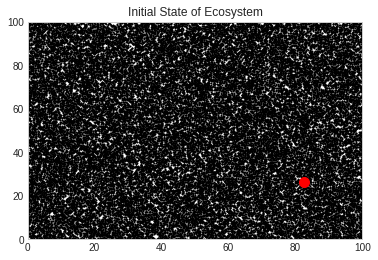

Dragon Weight: 10000
Deer Population: 50000




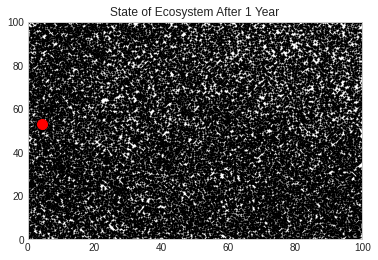

Dragon Weight: 51349.56769656464
Deer Population: 41909




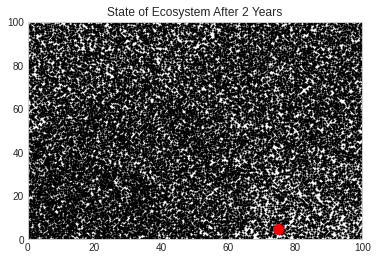

Dragon Weight: 36087.00594199671
Deer Population: 34926




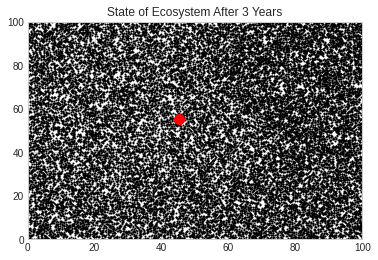

Dragon Weight: 31656.905519337706
Deer Population: 28437




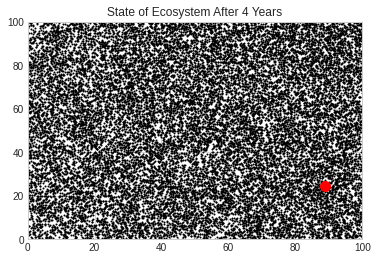

Dragon Weight: 29626.00589737253
Deer Population: 22720




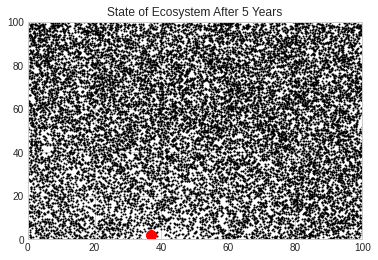

Dragon Weight: 18534.89980962178
Deer Population: 17920




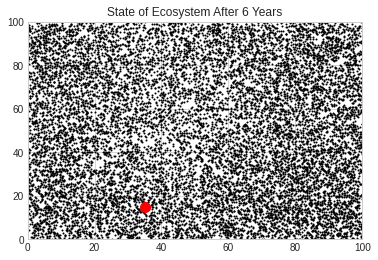

Dragon Weight: 14455.687968228323
Deer Population: 13662




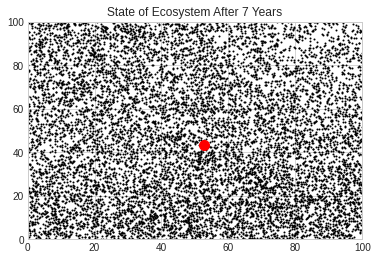

Dragon Weight: 11696.451195868758
Deer Population: 10231




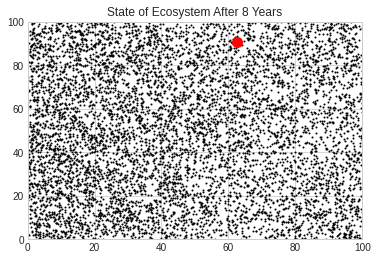

Dragon Weight: 8495.829042199448
Deer Population: 7393


DRAGON HAS DIED AFTER 3083 DAYS
DEER POPULATION AT TIME OF DEATH: 6181
MAX WEIGHT DURING LIFETIME OF 58312.29257209817 KGS ACHIEVED AFTER 38 DAYS 




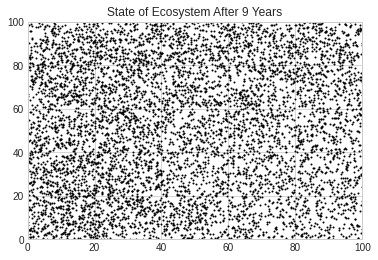

Deer Population: 6576




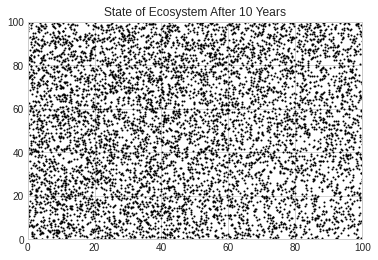

Deer Population: 6980




In [ ]:
initialize()
observe()

for x in range(10):
  for i in range(365):
    update()
  observe()

  




In [ ]:
global figs

count = 0
for fig in figs:
  fig.savefig("plot"+str(count)+".png", dpi=600, bbox_inches='tight')
  count +=1

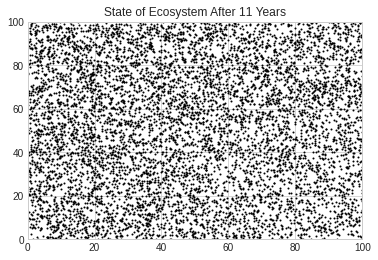

Deer Population: 7401




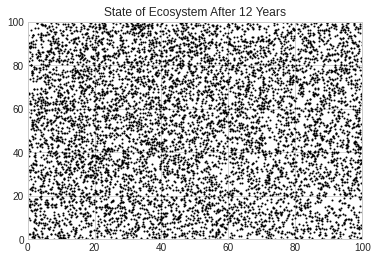

Deer Population: 7897




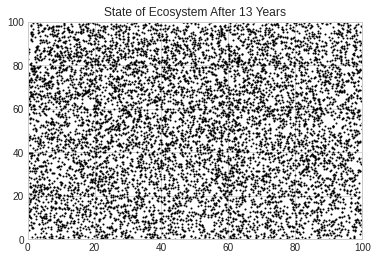

Deer Population: 8384




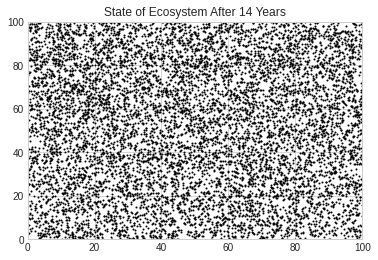

Deer Population: 8929




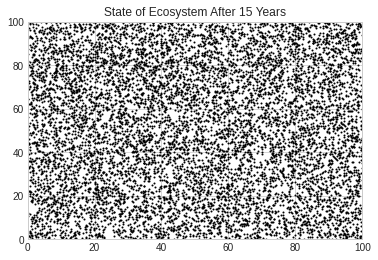

Deer Population: 9465




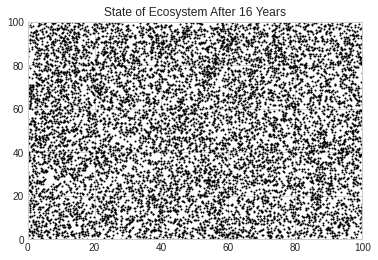

Deer Population: 10042




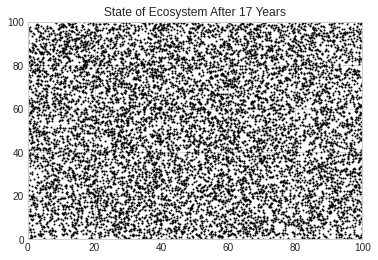

Deer Population: 10664




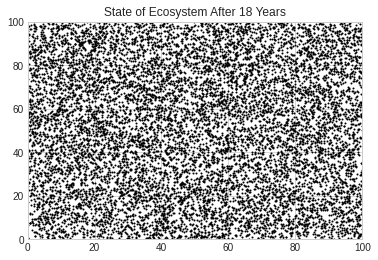

Deer Population: 11341




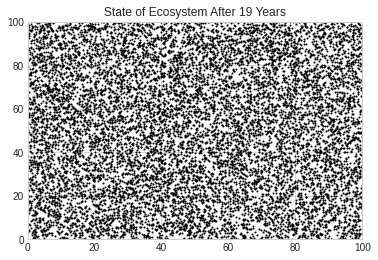

Deer Population: 12086




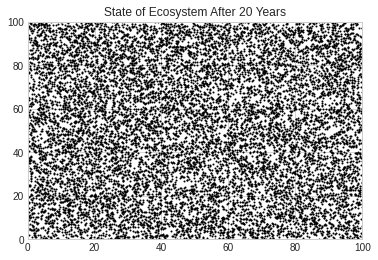

Deer Population: 12822




In [ ]:
for x in range(10):
  for i in range(365):
    update()
  observe()